In [11]:
# First things first, importing the datasets and overviewing

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_train = pd.read_csv(filepath_or_buffer= "../jobfair_train.csv")
df_test = pd.read_csv(filepath_or_buffer= "../jobfair_test.csv")


df_train.head()

,season,club_id,league_id,dynamic_payment_segment,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,league_match_watched_count_last_28_days,session_count_last_28_days,playtime_last_28_days,registration_country,registration_platform_specific,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
0,173,6042825,2912348,2) Minnow,134,25,5.255151,4.483009,1.778801,25,10,271,81281642,Portugal,Flash FB Canvas,24,435,11.0,598,245,186,818,2
1,173,9620967,2912140,2) Minnow,28,23,4.962521,4.785648,-0.002687,28,9,119,58448442,Turkey,Android Phone,19,58,7.0,269,0,35,24,2
2,173,6045474,2912933,4) Whale,136,23,11.105782,10.511133,0.628794,28,22,210,134640047,Belgium,Flash FB Canvas,26,116,8.0,23180,369,444,4933,1
3,173,14187773,2910371,0) NonPayer,2,21,4.164848,4.023486,0.551904,12,0,18,12143308,Malaysia,Android Phone,11,22,2.0,41,43,213,126,6
4,173,13694853,2907632,0) NonPayer,5,22,3.031939,2.926029,0.690544,0,0,0,0,Italy,iOS Phone,9,0,4.0,0,16,100,147,10


In [12]:
# After analyzing league_id distribution, I had to correct the offset between the distributions

max_league_id_train = df_train['league_id'].max()
max_league_id_test = df_test['league_id'].max()

offset = max_league_id_train - max_league_id_test

df_test['league_id'] = df_test['league_id'] + offset

Training Data Statistics:
        season       club_id     league_id  cohort_season  \
count  55314.0  5.531400e+04  5.531400e+04   55314.000000   
mean     173.0  1.210977e+07  2.909804e+06      23.409372   
std        0.0  3.384016e+06  2.102140e+03      42.009274   
min      173.0  2.750000e+02  2.904743e+06       1.000000   
25%      173.0  1.151105e+07  2.907961e+06       2.000000   
50%      173.0  1.392822e+07  2.910038e+06       4.000000   
75%      173.0  1.424454e+07  2.911697e+06      17.000000   
max      173.0  1.451477e+07  2.912940e+06     172.000000   

       avg_age_top_11_players  avg_stars_top_11_players  \
count            55314.000000              55314.000000   
mean                23.718661                  4.533516   
std                  2.206240                  1.204753   
min                 18.000000                  1.451697   
25%                 22.000000                  3.691136   
50%                 23.000000                  4.481376   
75%        

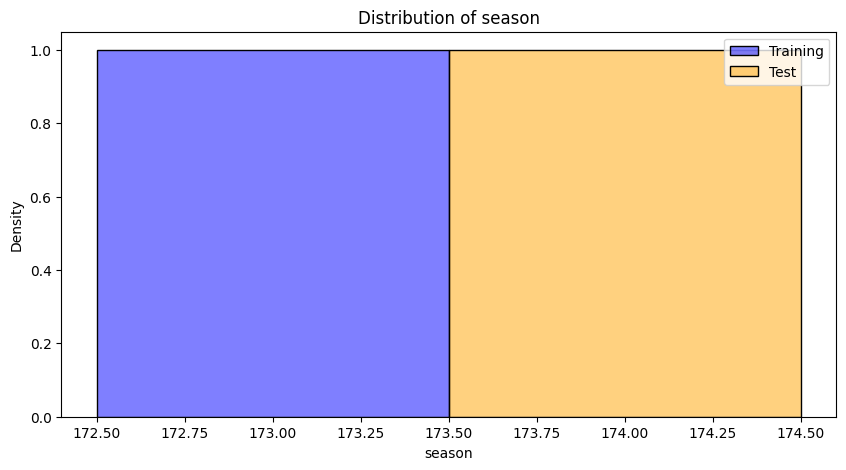

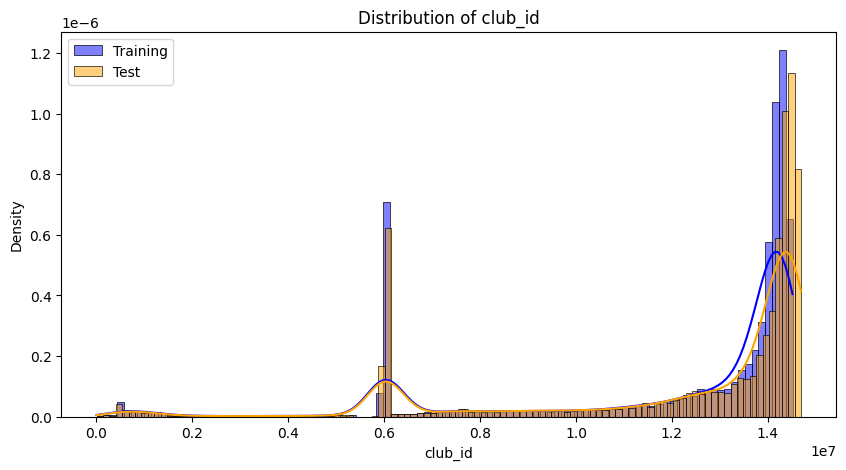

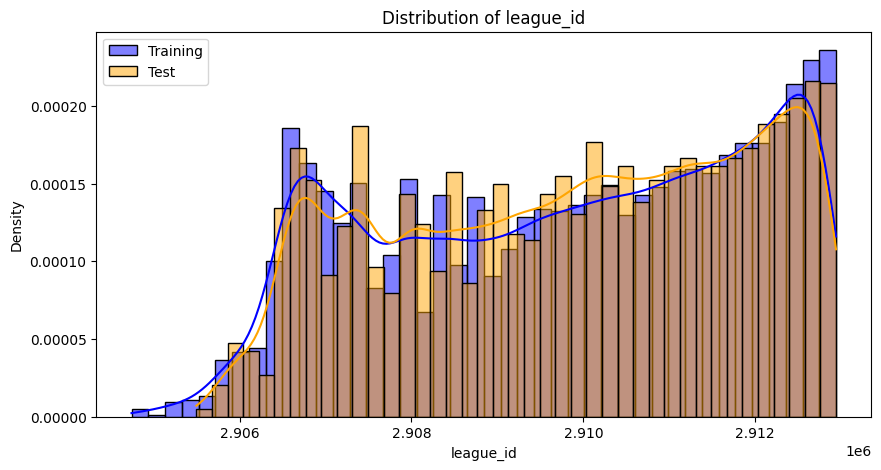

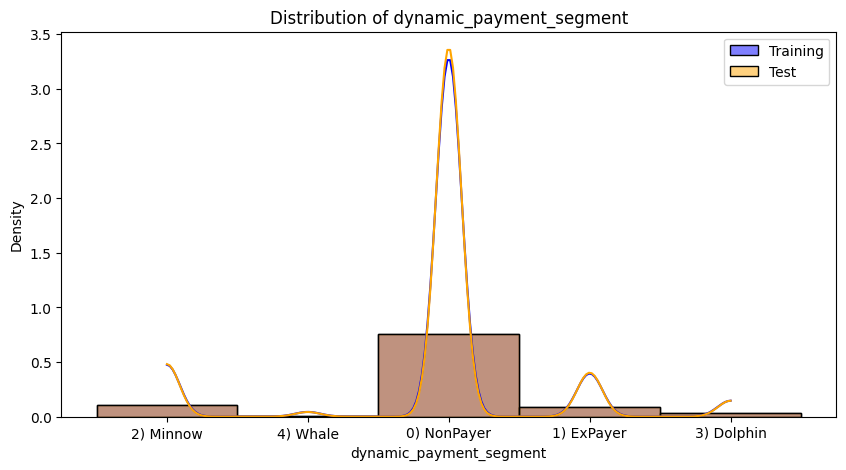

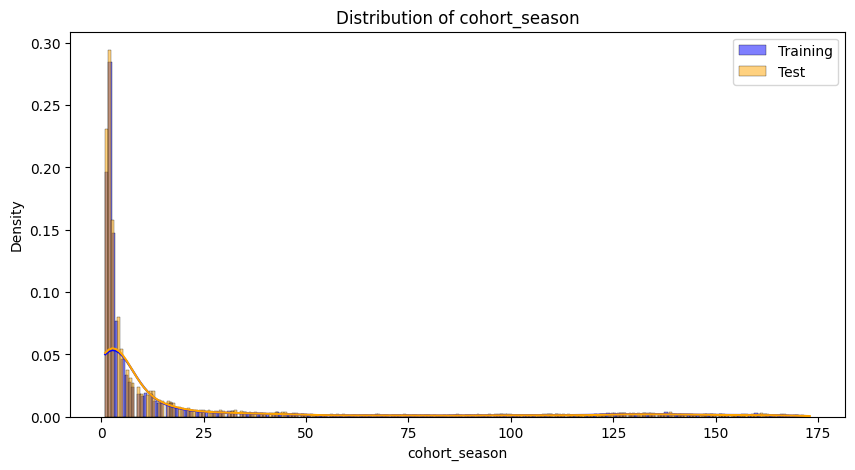

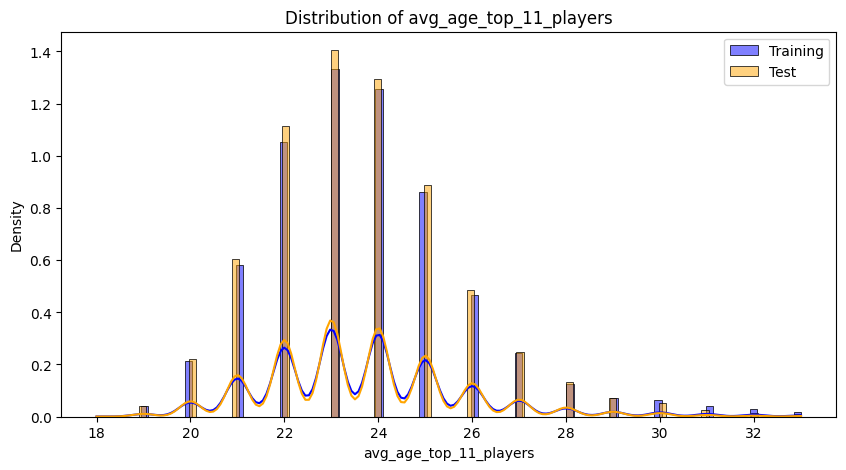

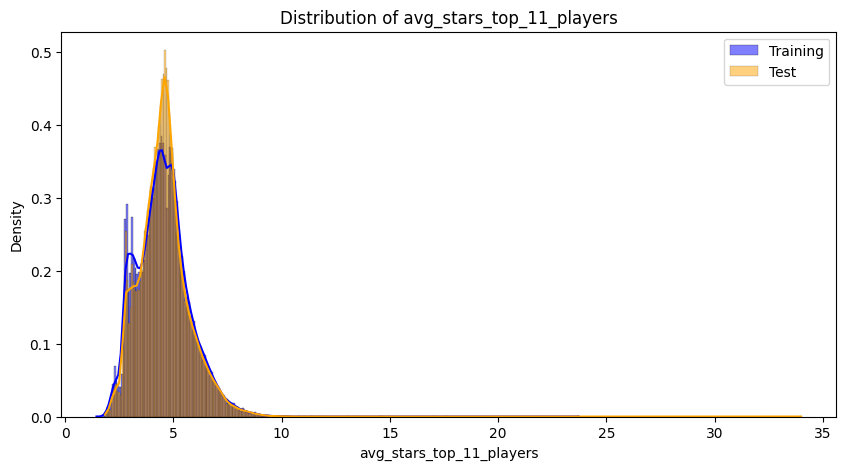

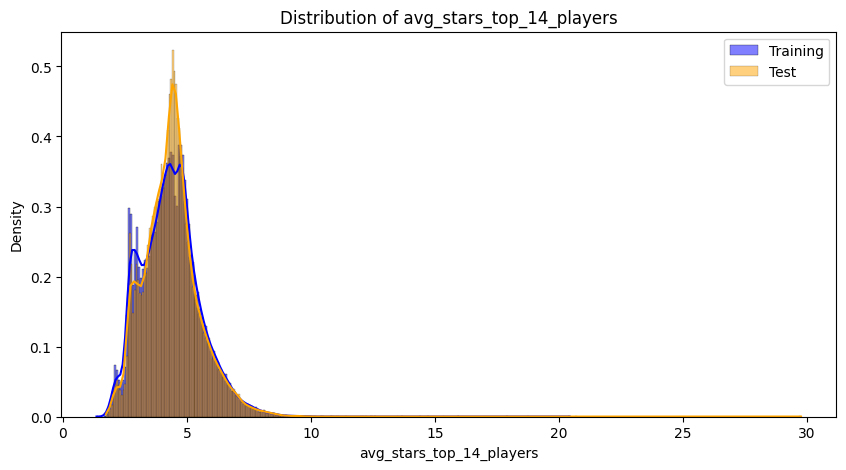

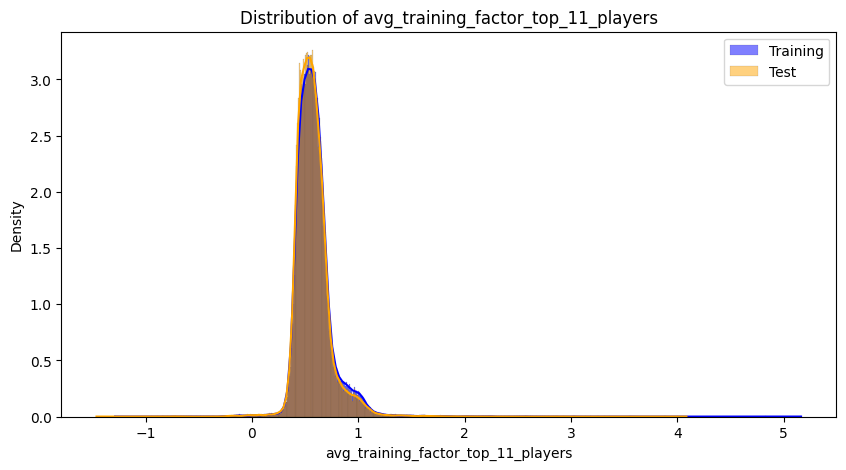

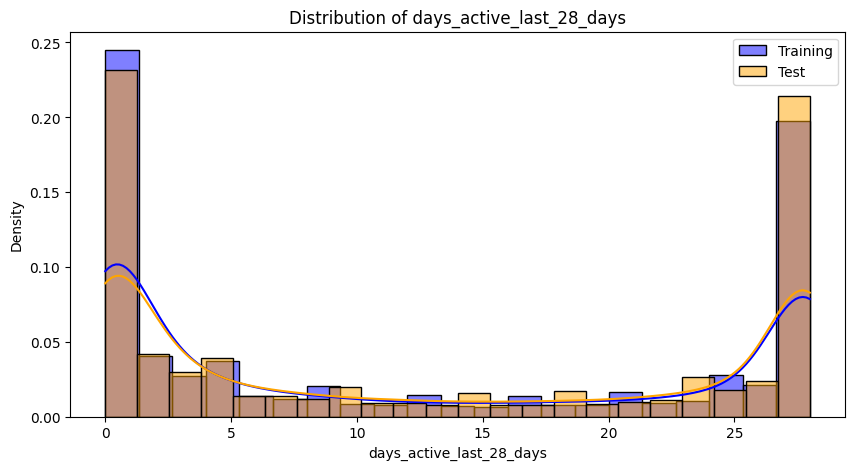

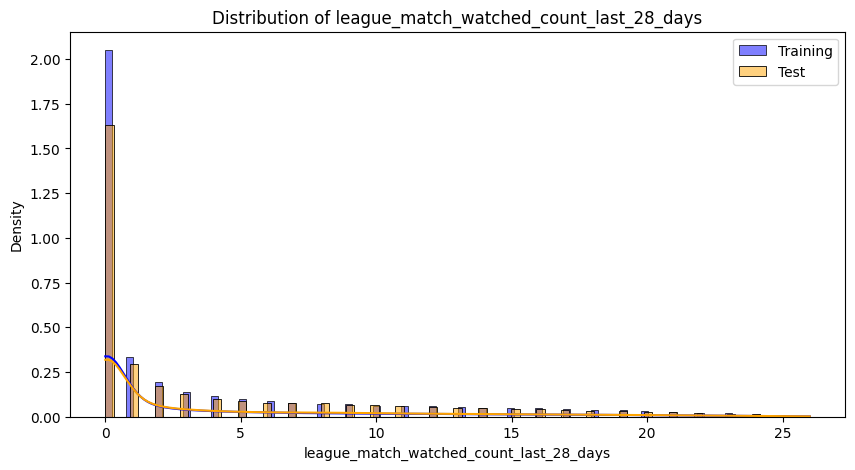

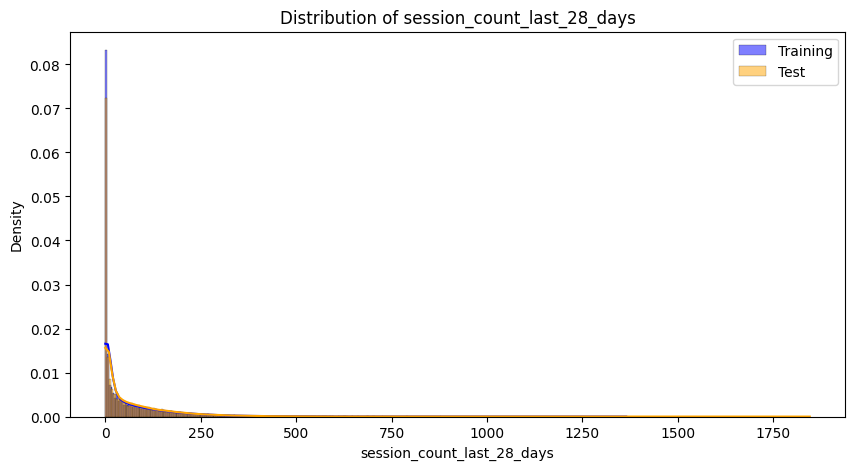

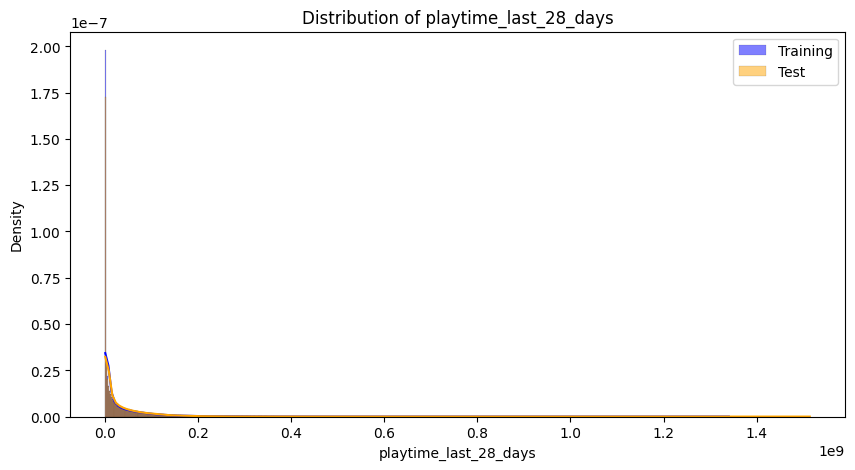

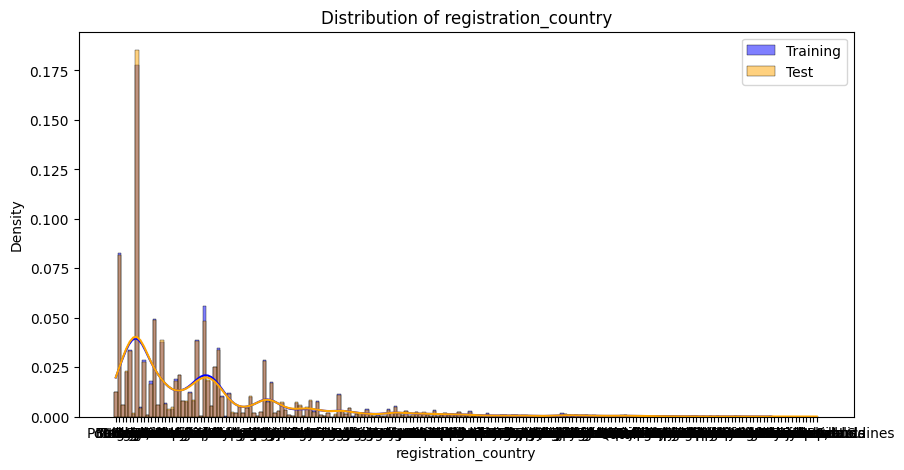

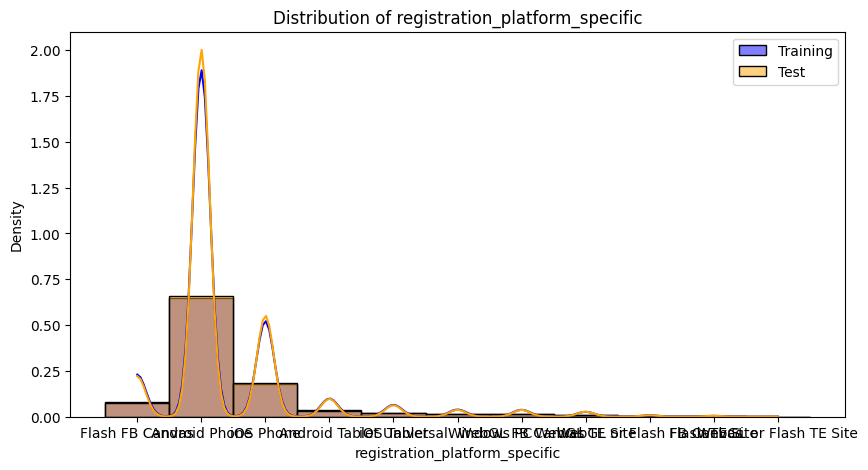

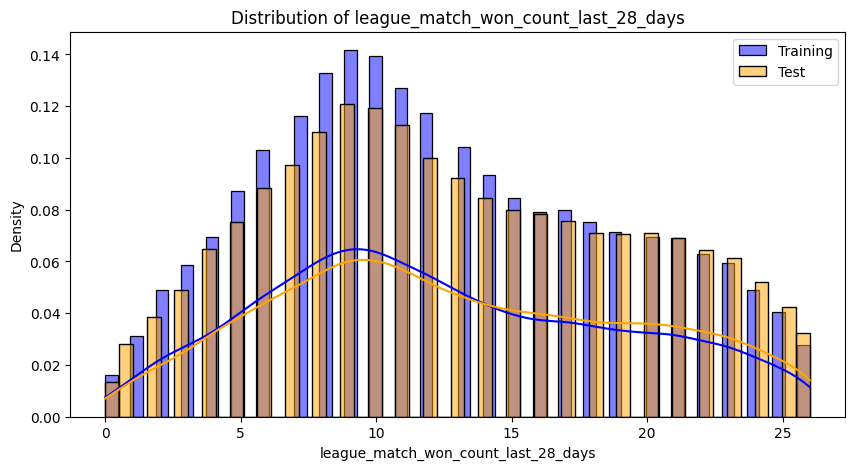

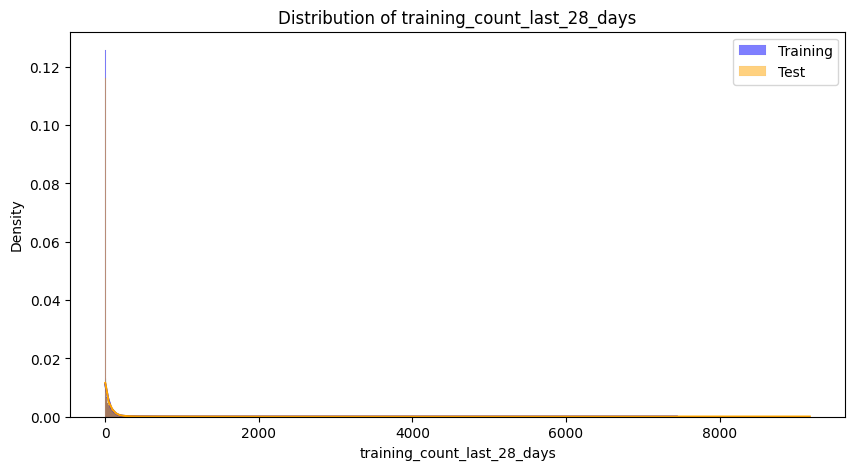

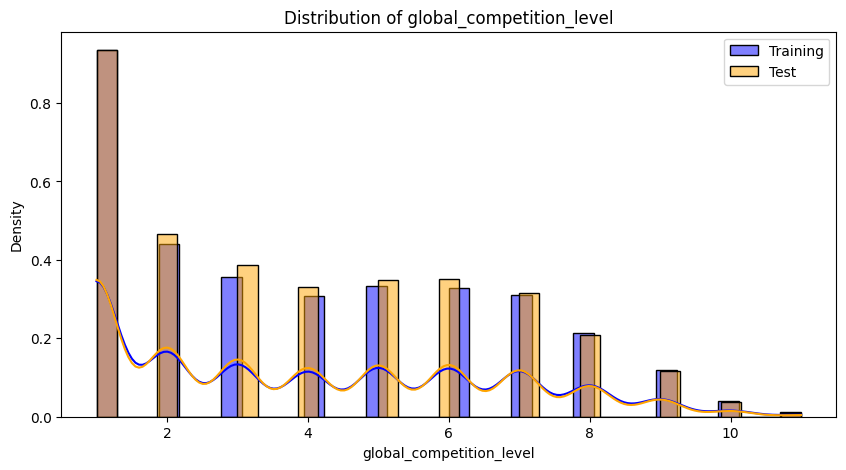

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


train_stats = df_train.describe()
test_stats = df_test.describe()
print("Training Data Statistics:")
print(train_stats)
print("\nTest Data Statistics:")
print(test_stats)

columns_to_exclude = ['global_competition_level ','tokens_spent_last_28_days', 'tokens_stash', 'rests_stash', 'morale_boosters_stash', 'league_rank']
for column in df_train.columns:
        if column not in columns_to_exclude:
            plt.figure(figsize=(10, 5))
            sb.histplot(df_train[column], kde=True, color='blue', label='Training', stat='density')
            sb.histplot(df_test[column], kde=True, color='orange', label='Test', stat='density')
            plt.title(f'Distribution of {column}')
            plt.legend()
            plt.show()


In [14]:
#  Preprocessing

In [15]:
# Redundant column values

# We are only looking at data from one season
df_train.drop("season", axis=1, inplace=True)
df_test.drop("season", axis=1, inplace=True)


In [16]:
# Checking for Missing values

df_train.isnull().sum()
df_test.isnull().sum()
# Global_competition_level has NaN values

df_train["global_competition_level"].describe()
df_test["global_competition_level"].describe()

# Switching NaN values to 0 so we can rate the players who opted out of the competition
df_train['global_competition_level'].fillna(0, inplace=True)
df_test['global_competition_level'].fillna(0, inplace=True)

In [17]:
# Taking a look at more descriptive statistics so I can further preprocess the data

df_test.describe()

,club_id,league_id,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,league_match_watched_count_last_28_days,session_count_last_28_days,playtime_last_28_days,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash
count,6.027000e+04,6.027000e+04,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,6.027000e+04,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000
mean,1.231070e+07,2.909858e+06,22.620657,23.633781,4.565916,4.379122,0.573575,13.019794,3.903700,66.781998,3.134407e+07,12.886610,60.133284,2.724705,119.214319,109.281118,279.102207,301.766053
std,3.369319e+06,2.015777e+03,41.011279,2.072796,1.145641,1.118190,0.166988,11.786486,5.998987,102.196593,5.285423e+07,6.536533,174.576951,2.794090,1088.752375,3076.191546,779.011815,816.312158
min,2.750000e+02,2.905498e+06,1.000000,18.000000,1.850327,1.739390,-1.462095,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-4945.000000,-142.000000,0.000000
25%,1.180220e+07,2.908084e+06,2.000000,22.000000,3.832633,3.641410,0.473739,1.000000,0.000000,1.000000,2.689052e+05,8.000000,0.000000,0.000000,0.000000,11.000000,41.000000,50.000000
50%,1.409312e+07,2.910071e+06,4.000000,23.000000,4.522091,4.355305,0.552765,10.000000,1.000000,22.000000,8.200241e+06,12.000000,14.000000,2.000000,45.000000,28.000000,90.000000,119.000000
75%,1.443673e+07,2.911652e+06,16.000000,25.000000,5.138358,4.948433,0.639126,27.000000,6.000000,96.000000,4.150036e+07,18.000000,65.000000,5.000000,108.000000,70.000000,242.000000,279.000000
max,1.469295e+07,2.912940e+06,173.000000,33.000000,33.991636,29.766400,4.086419,28.000000,26.000000,1846.000000,1.514428e+09,26.000000,9175.000000,11.000000,204794.000000,750050.000000,32606.000000,32767.000000


In [18]:
# Checking for Outliers

# Column "playtime_last_28_days" should display minutes in the last 28 days, but majority the values are greater than 28 days when converted to days
# I can discard the whole column, or leave it and assume it's valid for some other reason (different scale or intended number of days)
# I chose to leave it because I think it could still be a relevant factor in deteremening the final league position

df_train['tokens_stash'].sort_values(ascending=True)
df_test['tokens_stash'].sort_values(ascending=True)

# Column "tokens_stash" and "rests_stash" have some outlier negative values that I assume shouldn't make sense, so I drop them
df_train.drop(df_train[df_train['tokens_stash'] < 0].index, inplace=True)
df_train.drop(df_train[df_train['rests_stash'] < 0].index, inplace=True)
df_test.drop(df_train[df_train['tokens_stash'] < 0].index, inplace=True)
df_test.drop(df_train[df_train['rests_stash'] < 0].index, inplace=True)

In [19]:
# Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder


# dynamic_payment_segment has an order so I want to perserve it while encoding it to a numerical value
le = LabelEncoder()
df_train['dynamic_payment_segment'] = le.fit_transform(df_train['dynamic_payment_segment'])
df_test['dynamic_payment_segment'] = le.fit_transform(df_test['dynamic_payment_segment'])


# registration_country has a lot of different values, so I use frequency encoding

unique_countries_train = set(df_train['registration_country'].unique())
unique_countries_test = set(df_test['registration_country'].unique())

# Marking unknown countries to the train set as Other

if unique_countries_train == unique_countries_test:
    print("Unique values in the training set and test set match.")
else:
    print("Unique values in the training set and test set do not match.")
    new_countries_in_test = set(df_test['registration_country'].unique()) - set(df_train['registration_country'].unique())
    print(new_countries_in_test)
    df_test['registration_country'] = df_test['registration_country'].replace(list(new_countries_in_test), 'Other')

frequency_encoding = df_train['registration_country'].value_counts(normalize=True).to_dict()
df_train['registration_country'] = df_train['registration_country'].map(frequency_encoding)

frequency_encoding = df_test['registration_country'].value_counts(normalize=True).to_dict()
df_test['registration_country'] = df_test['registration_country'].map(frequency_encoding)


# registration_platform_specific (eventually removed)

df_train_encoded = pd.get_dummies(df_train['registration_platform_specific'], prefix='platform')
df_train_encoded = df_train_encoded.astype(int)
df_train = pd.concat([df_train, df_train_encoded], axis=1)
df_train = df_train.drop('registration_platform_specific', axis=1)

df_test_encoded = pd.get_dummies(df_test['registration_platform_specific'], prefix='platform')
df_test_encoded = df_test_encoded.astype(int)
df_test = pd.concat([df_test, df_test_encoded], axis=1)
df_test = df_test.drop('registration_platform_specific', axis=1)


# league id encoding


Unique values in the training set and test set do not match.
{'Virgin Islands, U.S.', 'Cayman Islands', 'Bermuda', 'Antigua and Barbuda', 'Aland Islands', 'Central African Republic', 'Guinea', 'Suriname', 'Djibouti', 'Liechtenstein', 'Saint Vincent and the Grenadines', 'Curacao', 'Bhutan'}


In [21]:
df_train.head(10)

,club_id,league_id,dynamic_payment_segment,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,league_match_watched_count_last_28_days,session_count_last_28_days,playtime_last_28_days,registration_country,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank,platform_Android Phone,platform_Android Tablet,platform_Flash FB Canvas,platform_Flash TE Site,platform_UniversalWindows PC,platform_WebGL FB Canvas,platform_WebGL TE Site,platform_WebGL or Flash FB Canvas,platform_WebGL or Flash TE Site,platform_iOS Phone,platform_iOS Tablet
0,6042825,2912348,2,134,25,5.255151,4.483009,1.778801,25,10,271,81281642,0.012603,24,435,11.0,598,245,186,818,2,0,0,1,0,0,0,0,0,0,0,0
1,9620967,2912140,2,28,23,4.962521,4.785648,-0.002687,28,9,119,58448442,0.082468,19,58,7.0,269,0,35,24,2,1,0,0,0,0,0,0,0,0,0,0
2,6045474,2912933,4,136,23,11.105782,10.511133,0.628794,28,22,210,134640047,0.005840,26,116,8.0,23180,369,444,4933,1,0,0,1,0,0,0,0,0,0,0,0
3,14187773,2910371,0,2,21,4.164848,4.023486,0.551904,12,0,18,12143308,0.022475,11,22,2.0,41,43,213,126,6,1,0,0,0,0,0,0,0,0,0,0
4,13694853,2907632,0,5,22,3.031939,2.926029,0.690544,0,0,0,0,0.033848,9,0,4.0,0,16,100,147,10,0,0,0,0,0,0,0,0,0,1,0
5,5990762,2912548,0,104,23,5.165491,5.014962,0.508691,28,6,113,52316063,0.033848,18,66,3.0,117,32,52,28,2,0,0,0,0,0,0,0,0,0,1,0
6,14223642,2911299,2,2,23,5.331697,5.165514,0.260603,25,11,176,115438831,0.001501,21,105,6.0,313,19,48,27,2,0,0,0,0,0,0,0,0,0,1,0
7,11709507,2910371,0,16,24,3.881236,3.727657,0.587786,1,1,1,2438713,0.177738,12,2,0.0,9,25,97,181,12,1,0,0,0,0,0,0,0,0,0,0
8,14492950,2905919,0,1,27,4.307879,4.078724,0.442616,7,5,25,15506003,0.004629,6,22,1.0,78,4,6,66,7,1,0,0,0,0,0,0,0,0,0,0
9,14436853,2906383,0,1,22,3.757782,3.536762,0.611114,3,0,9,5814384,0.028641,14,12,0.0,47,39,31,66,5,1,0,0,0,0,0,0,0,0,0,0


In [22]:
# Feature extraction for df_train

# Choices based on some feature importance, correlation and hyperparameter tuning analysis

df_train['training_efficiency'] = df_train['training_count_last_28_days'] / df_train['avg_training_factor_top_11_players']
df_train = df_train.drop(['avg_training_factor_top_11_players'], axis=1)

df_train['combined_avg_stars'] = df_train[['avg_stars_top_11_players', 'avg_stars_top_14_players']].mean(axis=1)
df_train = df_train.drop(['avg_stars_top_11_players', 'avg_stars_top_14_players'], axis=1)

df_train['avg_sessions_per_day'] = np.where(
    df_train['days_active_last_28_days'] != 0,
    df_train['session_count_last_28_days'] / df_train['days_active_last_28_days'],
    0  
)

df_train['avg_playtime_per_session'] = np.where(
    df_train['session_count_last_28_days'] != 0,
    df_train['playtime_last_28_days'] / df_train['session_count_last_28_days'],
    0  
)


df_train['avg_tokens_spent'] = np.where(
    df_train['days_active_last_28_days'] != 0,
    df_train['tokens_spent_last_28_days'] / df_train['days_active_last_28_days'],
    0  
)



df_train = df_train.drop(['session_count_last_28_days', 'playtime_last_28_days','registration_country', 'tokens_spent_last_28_days'], axis=1)

df_train = df_train.drop(['avg_playtime_per_session', 'tokens_stash', 'rests_stash', ], axis=1)

df_train = df_train.drop(['avg_age_top_11_players'], axis=1)

df_train = df_train.drop(['platform_iOS Tablet', 'platform_UniversalWindows PC', 'platform_WebGL FB Canvas','platform_iOS Phone'], axis=1)
df_train = df_train.drop(['platform_Android Tablet', 'platform_WebGL TE Site', 'platform_Flash TE Site', 'platform_Android Phone'], axis=1)
df_train = df_train.drop(['platform_WebGL or Flash FB Canvas', 'platform_WebGL or Flash TE Site'], axis=1)



df_train.head(10)

# Creating new feature so I rate the players performance  relative to other clubs in the league
features = ['days_active_last_28_days', 'league_match_won_count_last_28_days', 'avg_sessions_per_day', 'cohort_season', 'combined_avg_stars']
df_train['relative_score'] = df_train.groupby('league_id')[features].rank(pct=True).mean(axis=1)
df_train['relative_score'] = df_train['relative_score'] * 13 + 1

##########
df_train['interaction_score_days_active'] = df_train['relative_score'] * df_train['days_active_last_28_days']
df_train['relative_score2'] = df_train['relative_score'] * df_train['training_efficiency']
df_train['relative_score3'] = df_train['combined_avg_stars'] * df_train['combined_avg_stars']


In [23]:
# Feature extraction for df_test

# Choices based on some feature importance, correlation, and hyperparameter tuning analysis

df_test['training_efficiency'] = df_test['training_count_last_28_days'] / df_test['avg_training_factor_top_11_players']
df_test = df_test.drop(['avg_training_factor_top_11_players'], axis=1)

df_test['combined_avg_stars'] = df_test[['avg_stars_top_11_players', 'avg_stars_top_14_players']].mean(axis=1)
df_test = df_test.drop(['avg_stars_top_11_players', 'avg_stars_top_14_players'], axis=1)

df_test['avg_sessions_per_day'] = np.where(
    df_test['days_active_last_28_days'] != 0,
    df_test['session_count_last_28_days'] / df_test['days_active_last_28_days'],
    0  
)

df_test['avg_playtime_per_session'] = np.where(
    df_test['session_count_last_28_days'] != 0,
    df_test['playtime_last_28_days'] / df_test['session_count_last_28_days'],
    0  
)

df_test['avg_tokens_spent'] = np.where(
    df_test['days_active_last_28_days'] != 0,
    df_test['tokens_spent_last_28_days'] / df_test['days_active_last_28_days'],
    0  
)

df_test = df_test.drop(['session_count_last_28_days', 'playtime_last_28_days','registration_country', 'tokens_spent_last_28_days'], axis=1)

df_test = df_test.drop(['avg_playtime_per_session', 'tokens_stash', 'rests_stash'], axis=1)

df_test = df_test.drop(['avg_age_top_11_players'], axis=1)

df_test = df_test.drop(['platform_iOS Tablet', 'platform_UniversalWindows PC', 'platform_WebGL FB Canvas','platform_iOS Phone'], axis=1)
df_test = df_test.drop(['platform_Android Tablet', 'platform_WebGL TE Site', 'platform_Flash TE Site', 'platform_Android Phone'], axis=1)
df_test = df_test.drop(['platform_WebGL or Flash FB Canvas', 'platform_WebGL or Flash TE Site'], axis=1)

df_test.head(10)

# Creating new feature so I rate the players performance  relative to other clubs in the league
features = ['days_active_last_28_days', 'league_match_won_count_last_28_days', 'avg_sessions_per_day', 'cohort_season', 'combined_avg_stars']
df_test['relative_score'] = df_test.groupby('league_id')[features].rank(pct=True).mean(axis=1)
df_test['relative_score'] = df_test['relative_score'] * 13 + 1


##########
df_test['interaction_score_days_active'] = df_test['relative_score'] * df_test['days_active_last_28_days']
df_test['relative_score2'] = df_test['relative_score'] * df_test['training_efficiency']
df_test['relative_score3'] = df_test['combined_avg_stars'] * df_test['combined_avg_stars']


In [24]:
df_train.describe()

,club_id,league_id,dynamic_payment_segment,cohort_season,days_active_last_28_days,league_match_watched_count_last_28_days,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,morale_boosters_stash,league_rank,platform_Flash FB Canvas,training_efficiency,combined_avg_stars,avg_sessions_per_day,avg_tokens_spent,relative_score,interaction_score_days_active,relative_score2,relative_score3
count,5.530600e+04,5.530600e+04,55306.000000,55306.00000,55306.000000,55306.000000,55306.000000,55306.000000,55306.00000,55306.000000,55306.000000,55306.000000,55306.000000,55306.000000,55306.000000,55306.000000,55306.000000,55306.000000,5.530600e+04,55306.000000
mean,1.210969e+07,2.909804e+06,0.449300,23.40954,12.356580,3.622790,12.411709,61.112176,2.66302,307.106209,7.499801,0.078454,93.113193,4.438939,2.984031,8.091490,7.964353,118.961766,9.163431e+02,21.119872
std,3.384109e+06,2.102149e+03,0.886103,42.00892,11.849094,5.905942,6.403043,188.300912,2.82880,823.418627,4.031103,0.268888,1848.129676,1.189841,3.591301,34.524665,2.534380,126.297000,2.074686e+04,11.824173
min,2.750000e+02,2.904743e+06,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,-419154.679513,1.403301,0.000000,0.000000,1.928571,0.000000,-4.778363e+06,1.969253
25%,1.151015e+07,2.907961e+06,0.000000,2.00000,1.000000,0.000000,8.000000,0.000000,0.00000,52.000000,4.000000,0.000000,0.000000,3.594722,1.000000,0.000000,6.014286,4.528571,0.000000e+00,12.922026
50%,1.392822e+07,2.910038e+06,0.000000,4.00000,7.000000,0.000000,12.000000,11.000000,1.00000,118.000000,7.000000,0.000000,19.877052,4.395321,2.000000,2.681818,7.778571,54.128571,1.419101e+02,19.318843
75%,1.424454e+07,2.911697e+06,0.000000,17.00000,27.000000,5.000000,17.000000,63.000000,5.00000,281.000000,11.000000,0.000000,119.361242,5.118220,4.000000,7.107143,9.914286,242.400000,1.130445e+03,26.196173
max,1.451477e+07,2.912940e+06,4.000000,172.00000,28.000000,26.000000,26.000000,7443.000000,11.00000,32767.000000,14.000000,1.000000,59489.477011,22.075474,48.750000,4294.035714,14.000000,392.000000,4.961984e+05,487.326574


In [25]:
df_test.describe()

,club_id,league_id,dynamic_payment_segment,cohort_season,days_active_last_28_days,league_match_watched_count_last_28_days,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,morale_boosters_stash,platform_Flash FB Canvas,training_efficiency,combined_avg_stars,avg_sessions_per_day,avg_tokens_spent,relative_score,interaction_score_days_active,relative_score2,relative_score3
count,6.027000e+04,6.027000e+04,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,60270.000000,6.027000e+04,60270.000000
mean,1.231070e+07,2.909858e+06,0.441911,22.620657,13.019794,3.903700,12.886610,60.133284,2.724705,301.766053,0.072407,106.090809,4.472519,3.145844,8.116759,7.964286,124.468971,1.039352e+03,21.282526
std,3.369319e+06,2.015777e+03,0.878262,41.011279,11.786486,5.998987,6.536533,174.576951,2.794090,816.312158,0.259164,1361.504087,1.130981,3.603033,42.893556,2.523756,125.472951,1.308391e+04,12.070906
min,2.750000e+02,2.905498e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-62918.042446,1.802464,0.000000,0.000000,1.928571,0.000000,-6.997385e+05,3.248878
25%,1.180220e+07,2.908084e+06,0.000000,2.000000,1.000000,0.000000,8.000000,0.000000,0.000000,50.000000,0.000000,0.000000,3.737875,1.000000,0.000000,6.014286,6.014286,0.000000e+00,13.971710
50%,1.409312e+07,2.910071e+06,0.000000,4.000000,10.000000,1.000000,12.000000,14.000000,2.000000,119.000000,0.000000,25.810837,4.438640,2.038462,2.886752,7.871429,71.350000,1.878652e+02,19.701522
75%,1.443673e+07,2.911652e+06,0.000000,16.000000,27.000000,6.000000,18.000000,65.000000,5.000000,279.000000,0.000000,124.106758,5.042921,4.214286,7.119412,9.914286,247.250000,1.184281e+03,25.431056
max,1.469295e+07,2.912940e+06,4.000000,173.000000,28.000000,26.000000,26.000000,9175.000000,11.000000,32767.000000,1.000000,302576.605401,31.879018,65.928571,7314.071429,14.000000,392.000000,2.915542e+06,1016.271798


In [26]:
# Hyperparameter tuning - commented since its not needed to run every time

In [27]:
# Grid Search

In [28]:
# from sklearn.model_selection import GridSearchCV

# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error
# import xgboost as xgb
# from sklearn.model_selection import GroupShuffleSplit

# X = df_train.drop(['league_rank', 'club_id'], axis=1)
# y = df_train['league_rank']

# groups = df_train['league_id']

# # Initialize GroupShuffleSplit with the number of splits you desire
# n_splits = 1  # You can adjust this based on your needs
# group_splitter = GroupShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=23)

# # Split the data into training and test sets
# for train_index, test_index in group_splitter.split(X, y, groups):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# param_grid = {
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [5, 6],
#     'min_child_weight': [2, 3],
#     'subsample': [0.8, 0.9],
#     'colsample_bytree': [0.9, 1.0],
#     'n_estimators': [ 175, 200]
# }



# grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=23),
#                            param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=2)

# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:")
# print(best_params)

# best_model = grid_search.best_estimator_


In [29]:
# # Cross Validation - used to estimate model performance

# final_cv_predictions = cross_val_predict(final_model, X, y, cv=5)

# print(final_cv_predictions)
# final_cv_mae = mean_absolute_error(y, final_cv_predictions)
# print(f"Mean Absolute Error (MAE) during cross-validation with Final Model: {final_cv_mae:.4f}")

In [30]:

# Final model

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from sklearn.model_selection import GroupShuffleSplit

X = df_train.drop(['league_rank', 'club_id'], axis=1)
y = df_train['league_rank']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

groups = df_train['league_id']
group_splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=23)


for train_index, test_index in group_splitter.split(X, y, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

final_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    eval_metric='mae',
    random_state=23,
    colsample_bytree=0.9,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=2,
    n_estimators=200,
    subsample=0.9
)
final_model.fit(X_train, y_train)

final_predictions = final_model.predict(X_test)


predictions_df = df_train.loc[y_test.index, ['club_id', 'league_id']]
predictions_df['predicted_abs_pos'] = final_predictions
predictions_df['actual_position'] = y_test.values

predictions_df['predicted_rel_pos'] = predictions_df.groupby('league_id')['predicted_abs_pos'].rank(ascending=True, method='min')
predictions_df['predicted_rel_pos'] = predictions_df['predicted_rel_pos'].astype(int)



test_mae = mean_absolute_error(predictions_df['actual_position'], predictions_df['predicted_rel_pos'])
print(f"Mean Absolute Error on Test Set with Final Model: {test_mae:.4f}")
print(predictions_df.sort_values(by=['league_id', 'predicted_rel_pos']).head(50))


Mean Absolute Error on Test Set with Final Model: 2.0106
        club_id  league_id  predicted_abs_pos  actual_position  \
17743  14426634    2905169           1.174090                1   
17653  14454616    2905169           1.548497                2   
17575  14449897    2905169           4.334332                3   
17489  14463009    2905169           4.547556                6   
17496  14245505    2905169           5.928621                4   
17643  14490715    2905169           7.101127                8   
18053  14469870    2905169           8.066001                5   
17509  14303508    2905169           8.506177                7   
17648  14470464    2905169           9.268435               10   
7412   14424448    2905169           9.362638               12   
17782  14441186    2905169          10.870025               14   
17555  14460802    2905169          11.145403                9   
17566  14477507    2905169          11.405574               13   
17765  14505308    

In [31]:

X_test = df_test.drop(['club_id'], axis=1)

X_test_scaled = scaler.transform(X_test)

test_predictions = final_model.predict(X_test_scaled)


predictions_df = df_test[['club_id', 'league_id']].copy()
predictions_df['predicted_abs_pos'] = test_predictions
predictions_df['predicted_league_rank'] = predictions_df.groupby('league_id')['predicted_abs_pos'].rank(ascending=True, method='min')
predictions_df['predicted_league_rank'] = predictions_df['predicted_league_rank'].astype(int)
#predictions_df = predictions_df.sort_values(by=['league_id', 'predicted_position'])

print(predictions_df.sort_values(by=['league_id', 'predicted_league_rank']).head(50))


predictions_df = predictions_df.drop(['league_id', 'predicted_abs_pos'], axis=1)
predictions_df.to_csv('predictions.csv', index=False)



        club_id  league_id  predicted_abs_pos  predicted_league_rank
13158  14640324    2905498           1.295582                      1
55240  14621039    2905498           2.063545                      2
18126  14646103    2905498           2.858241                      3
56224  14657802    2905498           3.022436                      4
13220  14641979    2905498           4.040287                      5
18137  14644725    2905498           4.786797                      6
55359  14679772    2905498           7.065635                      7
13311  14627610    2905498           8.373185                      8
13263  14514021    2905498           8.900556                      9
18150  14632000    2905498          10.218528                     10
55369  14625391    2905498          10.921221                     11
13177  14636682    2905498          11.002575                     12
55509  14643992    2905498          11.851043                     13
13265  14688049    2905498        

In [32]:
# ANALYSIS

In [33]:
# Feature importance analysis

feature_importances = final_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                    Feature  Importance
14                           relative_score    0.530931
15            interaction_score_days_active    0.095848
2                             cohort_season    0.049298
16                          relative_score2    0.042564
11                       combined_avg_stars    0.032935
9                  platform_Flash FB Canvas    0.031990
5       league_match_won_count_last_28_days    0.025935
3                  days_active_last_28_days    0.022875
7                  global_competition_level    0.021617
12                     avg_sessions_per_day    0.019995
0                                 league_id    0.018371
10                      training_efficiency    0.017854
6               training_count_last_28_days    0.016721
17                          relative_score3    0.016467
13                         avg_tokens_spent    0.015696
8                     morale_boosters_stash    0.015477
1                   dynamic_payment_segment    0

In [34]:
# Correlation matrix analysis

correlation_matrix = df_train.drop(['league_rank', 'club_id'], axis=1).corr()

highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Adjust the threshold as needed
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

X_filtered = X.drop(highly_correlated, axis=1)

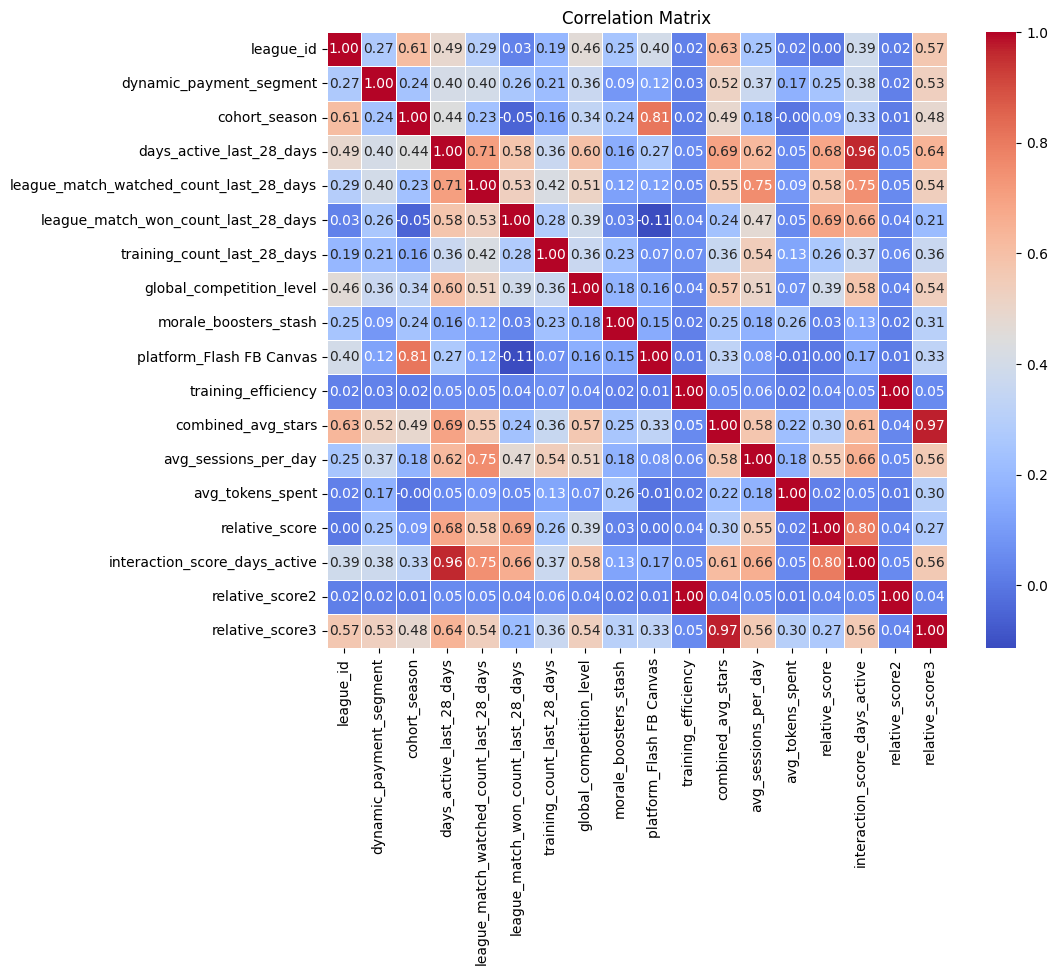

In [35]:
import seaborn as sb
import matplotlib.pyplot as plt

correlation_matrix = df_train.drop(['league_rank', 'club_id'], axis=1).corr()

plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

